# Concatenating 2 Dataframe(Train and test) as adult_dataset.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# import df_train.csv and df_test.csv file
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

In [4]:
df_train.head()

,age,hours_per_week,education_num_lv,cap_gain_low,cap_gain_high,cap_loss_low,cap_loss_high,Adm-clerical,Armed-Forces,Craft-repair,...,Transport-moving,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,label_dummies
0,0.301370,0.397959,3,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.122449,3,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.287671,0.397959,2,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.493151,0.397959,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.150685,0.397959,3,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
df_test.head()

,age,hours_per_week,education_num_lv,cap_gain_low,cap_gain_high,cap_loss_low,cap_loss_high,Adm-clerical,Armed-Forces,Craft-repair,...,Transport-moving,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,label_dummies
0,0.109589,0.397959,3,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.287671,0.500000,3,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.150685,0.397959,2,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.369863,0.397959,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0.013699,0.295918,3,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [6]:
#The number of columns and rows for each dataset
print("Dimension of df_train:", df_train.shape, "AND Dimension of df_test:", df_test.shape)

Dimension of df_train: (32561, 30) AND Dimension of df_test: (16281, 30)


In [7]:
#Concatenating 2 Dataframe(Train and test)
# df = pd.concat([df_train,df_test]),axis=0) --> concatenate row
# df = pd.concat([df_train,df_test]),axis=1) --> concatenate column
df = pd.concat([df_train,df_test], axis = 0)
df.shape

(48842, 30)

In [8]:
df.to_csv("adult_dataset.csv", index=False)

# Split adult_dataset for train and test

In [9]:
# import df_train.csv and df_test.csv file
df  = pd.read_csv("adult_dataset.csv")

In [10]:
df.head()

,age,hours_per_week,education_num_lv,cap_gain_low,cap_gain_high,cap_loss_low,cap_loss_high,Adm-clerical,Armed-Forces,Craft-repair,...,Transport-moving,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,label_dummies
0,0.301370,0.397959,3,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.122449,3,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.287671,0.397959,2,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.493151,0.397959,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.150685,0.397959,3,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
y_data = df['label_dummies']
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: label_dummies, dtype: int64

In [12]:
x_data = df.drop('label_dummies', axis = 1)
x_data.head()

,age,hours_per_week,education_num_lv,cap_gain_low,cap_gain_high,cap_loss_low,cap_loss_high,Adm-clerical,Armed-Forces,Craft-repair,...,Tech-support,Transport-moving,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0.301370,0.397959,3,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.452055,0.122449,3,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.397959,2,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.493151,0.397959,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.150685,0.397959,3,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Find the optimal test size

## Find the optimal random state

In [ ]:
x = []
y_acc = []
y_pre = []
y_re = []
y_f1 = []

for n in range (10): 
    
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=n)
    x.append(n)
    
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    
    acc = metrics.accuracy_score(y_test,y_predict)
    pre = metrics.precision_score(y_test,y_predict)
    re = metrics.recall_score(y_test,y_predict)
    f1 = metrics.f1_score(y_test,y_predict)
    
    y_acc.append(acc)
    y_pre.append(pre)
    y_re.append(re)
    y_f1.append(f1)
    
    #print(f"Accuracy (randon state {n}): ", metrics.accuracy_score(y_test,y_predict))
    #print(f"Precision (randon state {n}): ", metrics.precision_score(y_test,y_predict))
    #print(f"Recall (randon state {n}): ", metrics.recall_score(y_test,y_predict))
    #print(f"F1 (randon state {n}): ", metrics.f1_score(y_test,y_predict))
    #print()
    

    


In [ ]:
# for n in range (0,101): 
    
#     x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=n)
    
#     knn = KNeighborsClassifier(n_neighbors = 5)
#     knn.fit(x_train, y_train)
    
#     y_predict = knn.predict(x_test)
#     print(f"Accuracy (randon state {n}): ", metrics.accuracy_score(y_test,y_predict))

## Choose the most optimal random_state

We are using random_state number in range 1 - 100<br/>
From the result of the trial random_state, we can see that
at the random_state = 0 represents the optimal metric evaluation as follows:<br/>

Accuracy :  0.7948822927328557<br/>
Precision :  0.5739030023094688<br/>
Recall :  0.4398230088495575<br/>
F1 :  0.4979959919839679<br/>

In [13]:
random_size = [0.10, 0.20, 0.33, 0.40, 0.50]
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

for i in random_size: 
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=i, random_state=0)
    print(f"Number of test (test size = {i}) sample: ", x_test.shape[0])
    print("Number of train sample: ", x_train.shape[0])
    
    test_size = i

Number of test (test size = 0.1) sample:  4885
Number of train sample:  43957
Number of test (test size = 0.2) sample:  9769
Number of train sample:  39073
Number of test (test size = 0.33) sample:  16118
Number of train sample:  32724
Number of test (test size = 0.4) sample:  19537
Number of train sample:  29305
Number of test (test size = 0.5) sample:  24421
Number of train sample:  24421


In [14]:
y_acc1 = []
y_pre1 = []
y_re1 = []
y_f_1 = []
random_size = [0.10, 0.20, 0.33, 0.40, 0.50]

def test_size_trial(y_acc1, y_pre1, y_re1, y_f_1):

    for i in random_size: 

        x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=i, random_state=0)

        knn = KNeighborsClassifier(n_neighbors = 5)
        knn.fit(x_train, y_train)
        y_predict = knn.predict(x_test)

        acc1 = metrics.accuracy_score(y_test,y_predict)
        pre1 = metrics.precision_score(y_test,y_predict)
        re1 = metrics.recall_score(y_test,y_predict)
        f_1 = metrics.f1_score(y_test,y_predict)

        y_acc1.append(acc1)
        y_pre1.append(pre1)
        y_re1.append(re1)
        y_f_1.append(f_1)
    
    return y_acc1, y_pre1, y_re1, y_f_1

In [15]:
y_accuracy, y_precision, y_recall, y_fmeasure = test_size_trial(y_acc1, y_pre1, y_re1, y_f_1)

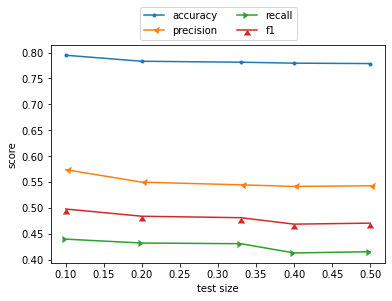

In [16]:
plt.plot(random_size, y_accuracy, label = 'accuracy', marker = '.')
plt.plot(random_size, y_precision, label = 'precision', marker = 4)
plt.plot(random_size, y_recall, label = 'recall', marker = 5)
plt.plot(random_size, y_fmeasure, label = 'f1', marker = 6)

# set x/y labels
plt.xlabel('test size')
plt.ylabel('score')

plt.legend(bbox_to_anchor = (0.75, 1.2), ncol = 2)
plt.show()

From the result of the trial random_state and test size, we can see that<br/>
at the random_state = 0 and test_size = 0.10

In [17]:
# random_state = 0 and test_size = 0.10

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=0)

# Fit data to KNN model

# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 5)

# Train the model using the training sets
knn.fit(x_train, y_train)

# Predict the response for test dataset
y_predict = knn.predict(x_test)

# meteics
print("Accuracy: ", metrics.accuracy_score(y_test,y_predict))
print("Precision: ", metrics.precision_score(y_test,y_predict))
print("Recall: ", metrics.recall_score(y_test,y_predict))
print("F1 (random_state = 0): ", metrics.f1_score(y_test,y_predict))

Accuracy:  0.7948822927328557
Precision:  0.5739030023094688
Recall:  0.4398230088495575
F1 (random_state = 0):  0.4979959919839679


At first we got the following metrics score as below<br/>
Accuracy = 79.45%<br/>
Precision = 57.39%<br/>
Recall =  43.98%<br/>
F1 (random_state = 0) =  49.80%<br/>

In order to get the most optimal model, we're gonna using cross-validation then

# Cross-validation

In [36]:
knn_scores = cross_val_score(knn, x_train, y_train, cv=5)
knn_scores

array([0.77365787, 0.77752502, 0.77158458, 0.78079854, 0.78079854])

In [37]:
# create a new KNN model n_neighbors = 5
knn_cv = KNeighborsClassifier(n_neighbors = 5)

In [40]:
# train model with cv = 5
cv_scores = cross_val_score(knn_cv, x_train, y_train, cv=5)

print(cv_scores)
print(f'cv_scores mean: {np.mean(cv_scores)}')
print(f'cv_scores std: {np.std(cv_scores)}')

[0.77365787 0.77752502 0.77158458 0.78079854 0.78079854]
cv_scores mean: 0.7768729113208158
cv_scores std: 0.0037295956313481656


In [41]:
# train model with cv = 10
cv_scores10 = cross_val_score(knn_cv, x_train, y_train, cv=10)

print(cv_scores10)
print(f'cv_scores mean: {np.mean(cv_scores10)}')
print(f'cv_scores std: {np.std(cv_scores10)}')

[0.77456779 0.76910828 0.77525023 0.78207461 0.77252047 0.77365787
 0.77820746 0.78521047 0.78270762 0.78998862]
cv_scores mean: 0.7783293427368556
cv_scores std: 0.006170281805230485


In [42]:
# train model with cv = 15
cv_scores15 = cross_val_score(knn_cv, x_train, y_train, cv=15)

print(cv_scores15)
print(f'cv_scores mean: {np.mean(cv_scores15)}')
print(f'cv_scores std: {np.std(cv_scores15)}')

[0.77550324 0.76833845 0.76322074 0.77516206 0.7761856  0.78744456
 0.78027977 0.77303754 0.76416382 0.78088737 0.78293515 0.78191126
 0.77918089 0.78191126 0.78737201]
cv_scores mean: 0.7771689161678019
cv_scores std: 0.007220211162247802


In [43]:
# cv = 5
mean = np.mean(cv_scores)
std = np.std(cv_scores)
x_index = []
for index, value in enumerate(cv_scores):
    x_index.append(index+1)

# cv = 10
mean10 = np.mean(cv_scores10)
std10 = np.std(cv_scores10)
x_index10 = []
for index10, value in enumerate(cv_scores10):
    x_index10.append(index10+1)

# cv = 15
mean15 = np.mean(cv_scores15)
std15 = np.std(cv_scores15)
x_index15 = []
for index15, value in enumerate(cv_scores15):
    x_index15.append(index15+1)
    
# #plt.fill_between(x_index, mean-std, mean+std, color = '#afeeee')
# plt.show()

# # set x/y labels
# plt.xlabel('cv')
# plt.ylabel('cv_scores')

### Cross validation plot (y axis : accuracy)

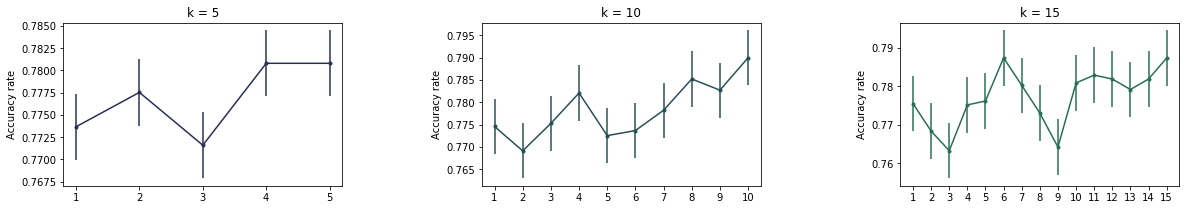

In [131]:
# cv =  5
plt.subplot(1, 3, 1)
plt.errorbar(x_index, cv_scores, yerr = std, color = '#282e54', marker = '.')
plt.title("k = 5")
plt.ylabel('Accuracy rate')
plt.xticks(range(1, 6, 1))

# cv =  10
plt.subplot(1, 3, 2)
plt.errorbar(x_index10, cv_scores10, yerr = std10, color = '#284e54', marker = '.')
plt.title("k = 10")
plt.ylabel('Accuracy rate')
plt.xticks(range(1, 11, 1))

# cv =  15
plt.subplot(1, 3, 3)
plt.errorbar(x_index15, cv_scores15, yerr = std15, color = '#286e54', marker = '.')
plt.title("k = 15")
plt.ylabel('Accuracy rate')
plt.xticks(range(1, 16, 1))

plt.subplots_adjust(wspace = 0.5)

plt.rcParams['figure.figsize'] = (20, 3)

In [115]:
accuracy = cross_val_score(knn_cv, x_train, y_train, cv=10, scoring ='accuracy').mean()
print("Accuracy {}".format(accuracy))

Accuracy 0.7783293427368556


# Find the optimal K

In [58]:
#1. cross-validation score
#2. train set score
#3. test set score

cross_score = []
cv_mean = []
cv_std = []
train_score = []
test_score = []
k_value = np.arange(1,50)
model = []

for k in k_value:
    knn_model = KNeighborsClassifier(k)

    #cross-validation list
    cross_val = cross_val_score(knn_model, x_train, y_train, cv=10)
    cv_mean.append(np.mean(cross_val))
    cv_std.append(np.std(cross_val))
    model.append(knn_model)

    #train list
    knn_model.fit(x_train,y_train)

    y_train_pr = knn_model.predict(x_train)
    acc_train = metrics.accuracy_score(y_train, y_train_pr)
    train_score.append(acc_train)

    #test list
    knn_model.fit(x_test, y_test)
    y_test_pr = knn_model.predict(x_test)
    acc_test = metrics.accuracy_score(y_test, y_test_pr)
    test_score.append(acc_test)

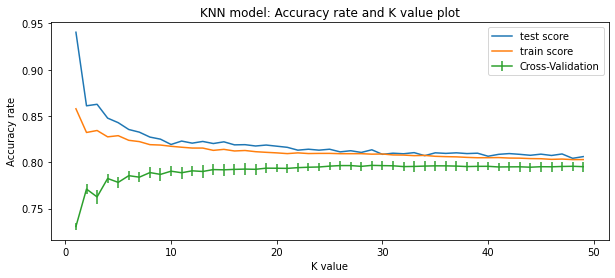

In [65]:
# visulization
plt.figure(figsize = (10, 4))
#test
plt.plot(k_value, test_score, label = 'test score')

#train
plt.plot(k_value, train_score, label = 'train score')

#cross-validation
plt.errorbar(k_value, cv_mean, yerr=cv_std, label='Cross-Validation')

plt.xlabel('K value')
plt.ylabel('Accuracy rate')
plt.legend(loc='upper right', ncol=1)
plt.title('KNN model: Accuracy rate and K value plot')

plt.show()

In [128]:
# optimal K
# max-score of cv_mean

optimal_model = model[max_score]
optimal_model

KNeighborsClassifier(n_neighbors=29)

In [129]:
# best score
for index1, value1 in enumerate(cv_mean):
    if value1 == max(cv_mean):
        max_score = index1
        print(f"The optimal K-value = {max_score+1}")

The optimal K-value = 29


In [134]:
# fit model to unseen data
optimal_model.fit(x_train, y_train)

y_pred = optimal_model.predict(x_test)

print(f"Accuracy rate = {metrics.accuracy_score(y_test, y_pred)}")
# print(f"Precision = {metrics.precision_score(y_test, y_pred)}")
# print(f"Recall = {metrics.recall_score(y_test, y_pred)}")
# print(f"F1 = {metrics.f1_score(y_test, y_pred)}")
print(f"Confusion matrix:\n = {metrics.confusion_matrix(y_test, y_pred)}")
print(metrics.classification_report(y_test, y_pred))

Accuracy rate = 0.8077789150460594
Confusion matrix:
 = [[3480  275]
 [ 664  466]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3755
           1       0.63      0.41      0.50      1130

    accuracy                           0.81      4885
   macro avg       0.73      0.67      0.69      4885
weighted avg       0.79      0.81      0.79      4885



In [ ]:
# where 0 is <= 50 and 1 